In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('jet_rail.csv')

In [2]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
df.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [4]:
#subsetting dataset at the end of Dec 2013
df=pd.read_csv('jet_rail.csv',nrows=11856)

#train-test split
train=df[:10392] #end of Oct 2013
test=df[10392:]

In [5]:
#aggregating on daily basis

df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [6]:
df.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


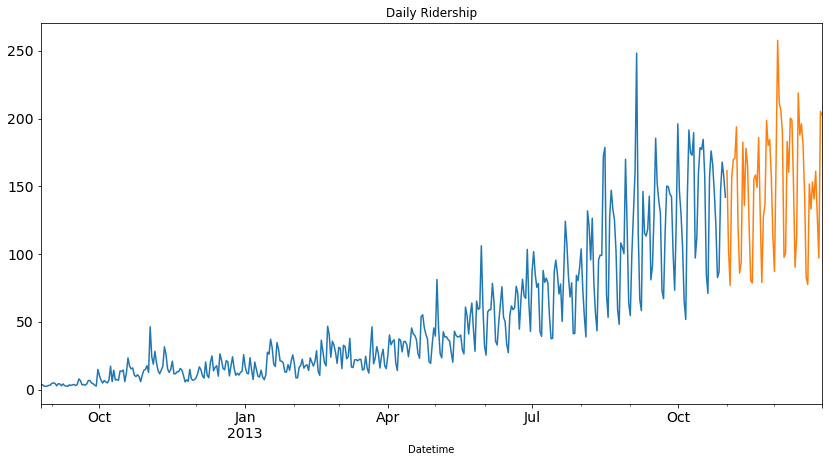

In [7]:
#Plotting data
train.Count.plot(figsize=(14,7), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(14,7), title= 'Daily Ridership', fontsize=14)
plt.show()

## Naive Method<br>
Assume previous value as the next predicted value

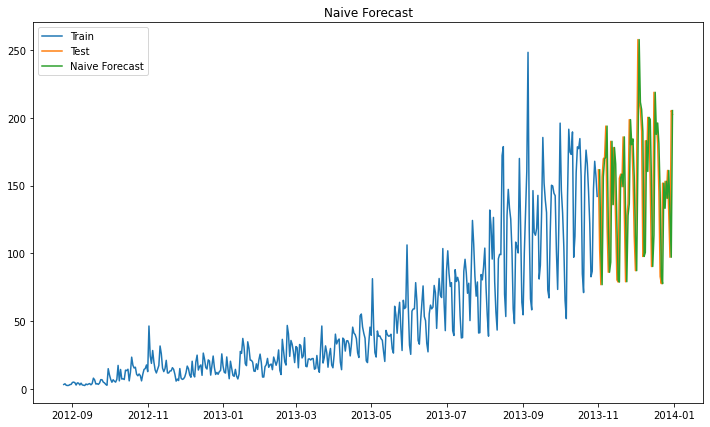

In [8]:

y_hat = test.copy()
y_hat['predict'] = test.Count.shift(1)
plt.figure(figsize=(12,7))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['predict'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [9]:
y_hat.head()

,ID,Count,predict
Datetime,,,
2013-11-01,10403.5,161.583333,NaN
2013-11-02,10427.5,103.083333,161.583333
2013-11-03,10451.5,76.833333,103.083333
2013-11-04,10475.5,156.416667,76.833333
2013-11-05,10499.5,169.750000,156.416667


In [10]:
from sklearn.metrics import mean_squared_error
y_hat=y_hat[1:]
rmse = np.sqrt(mean_squared_error(y_hat.Count, y_hat.predict))
print(rmse)

47.55761004453596


## Moving Average

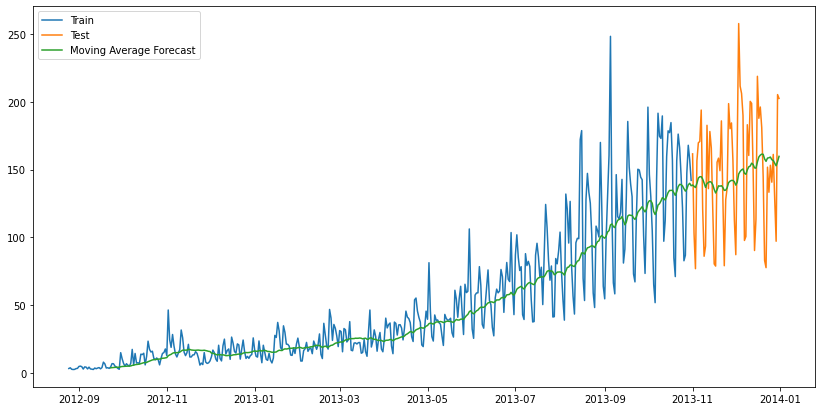

In [11]:

y_hat_avg = df['Count'].rolling(window=30).mean()
plt.figure(figsize=(14,7))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg, label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [12]:
y_hat_avg.size

494

In [13]:

y_hat_avg.tail(61)

Datetime
2013-11-01    138.569444
2013-11-02    137.675000
2013-11-03    136.744444
2013-11-04    139.783333
2013-11-05    143.716667
                 ...    
2013-12-27    156.661111
2013-12-28    154.797222
2013-12-29    152.802778
2013-12-30    155.883333
2013-12-31    159.727778
Freq: D, Name: Count, Length: 61, dtype: float64

In [14]:
#taking the MA for test_data
y_hat_avg[433:]

Datetime
2013-11-01    138.569444
2013-11-02    137.675000
2013-11-03    136.744444
2013-11-04    139.783333
2013-11-05    143.716667
                 ...    
2013-12-27    156.661111
2013-12-28    154.797222
2013-12-29    152.802778
2013-12-30    155.883333
2013-12-31    159.727778
Freq: D, Name: Count, Length: 61, dtype: float64

In [15]:
rmse=np.sqrt(mean_squared_error(test.Count,y_hat_avg[433:]))
print(rmse)

41.70909611244897


## Holt's Linear Trend Method

Exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


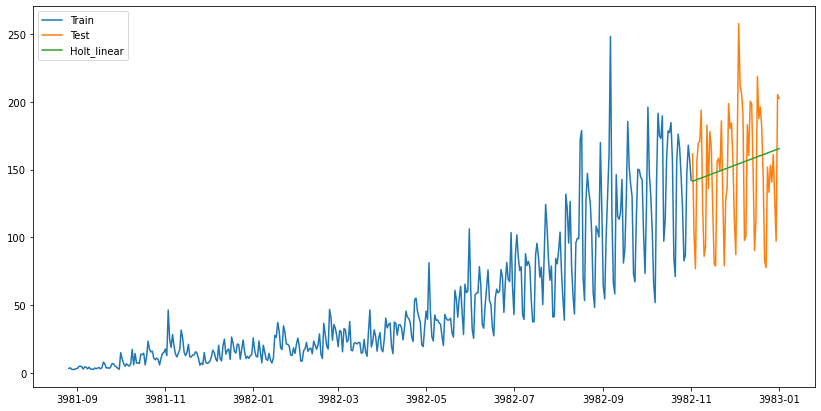

In [23]:
from statsmodels.tsa.api import Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
#y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
y_hat_avg['holt_linear']=fit1.forecast(len(test))

plt.figure(figsize=(14,7))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [25]:
rmse=np.sqrt(mean_squared_error(test.Count,y_hat_avg.holt_linear))
rmse

43.056259611507286

## Holts Winter Method

We need a method that takes into account both trend and seasonality to forecast future prices.The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


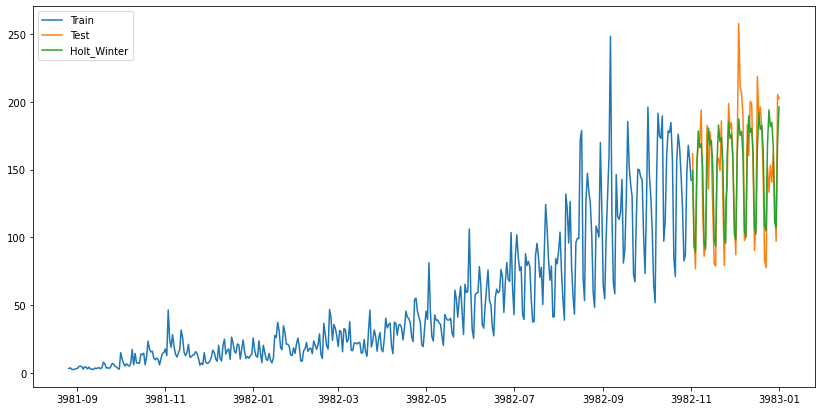

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(14,7))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [29]:
rmse=np.sqrt(mean_squared_error(test.Count,y_hat_avg.Holt_Winter))
rmse

23.961492566159794

## SARIMAX

While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the correlations in the data with each other. An improvement over ARIMA is Seasonal ARIMA. It takes into account the seasonality of dataset just like Holt’ Winter method.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


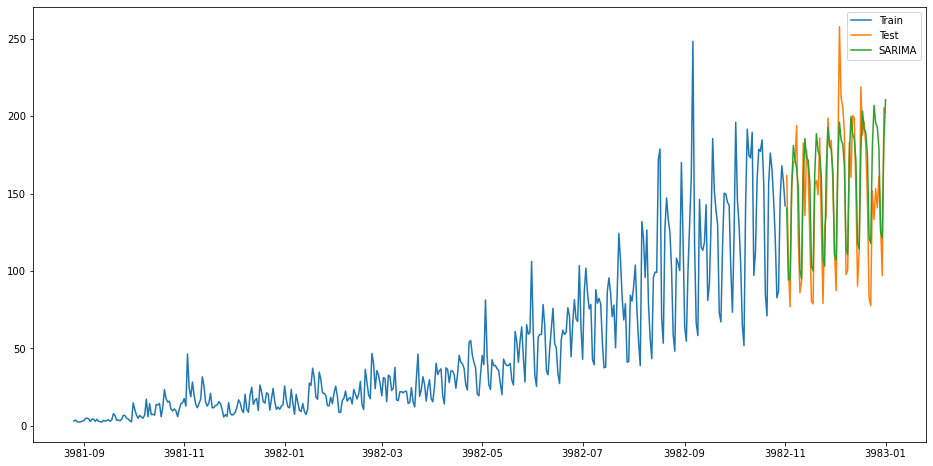

In [30]:
import statsmodels.api as sm

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [32]:
rmse=np.sqrt(mean_squared_error(test.Count,y_hat_avg.SARIMA))
rmse

26.05418647838525

# Conclusion<br><br>


|Model|RMSE|
|-----|----|
|Naive|47.55|
|Moving Average|41.70|
|Holts Linear Trend|43.05|
|Holts Winter Method|23.96|
|SARIMAX|26.05|

Hence, the Holts Winter Model proved to be the best out of the rest proposed models giving an RMSE error of about 24 for the given dataset.